***
***

# <center>Regressão Linear</center>

***

<cemter>![title](Dados/img/reg.gif)</center>

***
***

---

# Esborço


**A. Importações das Bibliotecas**<br>
I. [Importando Bibliotecas](#importacoes)<br>
II. [Verificando as Versões Instaladas](#verificação)<br>

**B. Importação da Base de Dados**<br>
I. [Carregando Base de Dados](#base_de_dados)<br>
II. [Estrutura dos Dados](#estrutura)<br>
III. [Informações Gerais](#info)<br>

**C. Análises Preliminares**<br>
I. [Estatísticas Descritivas](#descritiva)<br>
II. [Matriz de Correlação](#corr)<br>
III. [Comportamento da Variável Dependente](#comportamento)<br>
IV. [Boxplots](#boxplots)<br>
V. [Distribuição de Frequência](#dist)<br>

**D. Análises Gráficas**<br>
I. [Gráfico de Dispersão todosxtodos](#pairplor)<br>
II. [Análise de dispersão em relação ao consumo](#dispersão)<br>

**E. Processo de Separação dos Dados**<br>
I. [Dados de treino e teste](#separacao)<br>

**F. Criando Modelo de Regressão Linear**<br>
I. [Instânciando e treinando o estimador](#linearmodel)<br>
II. [Coeficientes de regressão](#coeficientes)<br>
III. [Obtendo o MSE com os dados de teste](#mse)<br>
IV. [Análises Gráficas das Previsões](#previsoes)<br>
V. [Salvando Modelo](#salvando)<br>

# A. Importações das Bibliotecas <br>

## Ai. Bibliotecas Utilizadas

<a id="importacoes"></a>

In [1]:
import matplotlib
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Aii. Verificando as versões utilizadas no projeto

<a id="verificação"></a>

In [3]:
print('--' * 16)
print(f'  Versão do Matplotlib-: {matplotlib.__version__}')
print(f'  Versão do seaborn-: {sns.__version__}')
print(f'  Versão do Pandas-: {pd.__version__}')
print(f'  Versão do Numpy-: {np.__version__}')
print('--' * 16)

--------------------------------
  Versão do Matplotlib-: 3.1.3
  Versão do seaborn-: 0.10.0
  Versão do Pandas-: 0.25.3
  Versão do Numpy-: 1.18.1
--------------------------------


# B. Importação da Base de Dados <br>


## Bi. Carregando a Base de Dados

<a id="base_de_dados"></a>

In [4]:
uri = 'Dados/Consumo_cerveja.csv'
dados = pd.read_csv(uri, sep=';')

In [5]:
# Visualizando os 10 primeiros registros do DataFrame
dados.head(10).style.background_gradient(cmap="Greens", subset=["consumo"])\
                    .background_gradient(cmap="Blues", subset=["temp_media", "temp_min", "temp_max", "chuva", "fds"])

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.3,23.9,32.5,0,0,25461
1,02/01/2015,27.02,24.5,33.5,0,0,28972
2,03/01/2015,24.82,22.4,29.9,0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21,28.3,0,0,28900
5,06/01/2015,23.78,20.1,30.5,12.2,0,28218
6,07/01/2015,24,19.5,33.7,0,0,29732
7,08/01/2015,24.9,19.5,32.8,48.6,0,28397
8,09/01/2015,28.2,21.9,34,4.4,0,24886
9,10/01/2015,26.76,22.1,34.2,0,1,37937


## Bii. Estrutura dos Dados

<a id="estrutura"></a>

In [6]:
# Utilizando o atributo shape do pandas
dados.shape

(365, 7)

In [7]:
print('--= Estrutura dos Dados =--')
print(f'    {dados.shape[0]} - Linhas')
print(f'    {dados.shape[1]} - Colunas')
print('---------------------------')

--= Estrutura dos Dados =--
    365 - Linhas
    7 - Colunas
---------------------------


## Biii. Informações Gerais

<a id="info"></a>

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
data          365 non-null object
temp_media    365 non-null float64
temp_min      365 non-null float64
temp_max      365 non-null float64
chuva         365 non-null float64
fds           365 non-null int64
consumo       365 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


# C. Analises Preliminares <br>

## C.i Estatísticas Descritivas

<a id="descritiva"></a>

In [9]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Cii. Matriz de Correlação
<a id="corr"></a>

In [10]:
dados.corr().round()

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0,1.0,1.0,0.0,-0.0,1.0
temp_min,1.0,1.0,1.0,0.0,-0.0,0.0
temp_max,1.0,1.0,1.0,-0.0,-0.0,1.0
chuva,0.0,0.0,-0.0,1.0,0.0,-0.0
fds,-0.0,-0.0,-0.0,0.0,1.0,1.0
consumo,1.0,0.0,1.0,-0.0,1.0,1.0


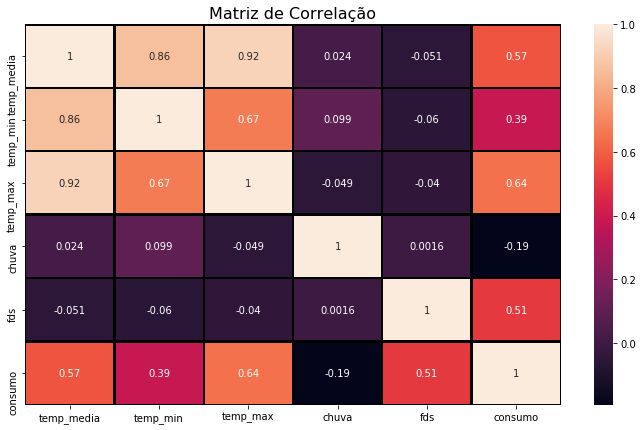

In [11]:
plt.figure(figsize=(12, 7))

sns.heatmap(dados.corr(), annot=True, lw=1.3, linecolor='k')

plt.title('Matriz de Correlação', fontsize=16);

## Ciii. Comportamento da Variável Dependente
<a id="comportamento"></a>

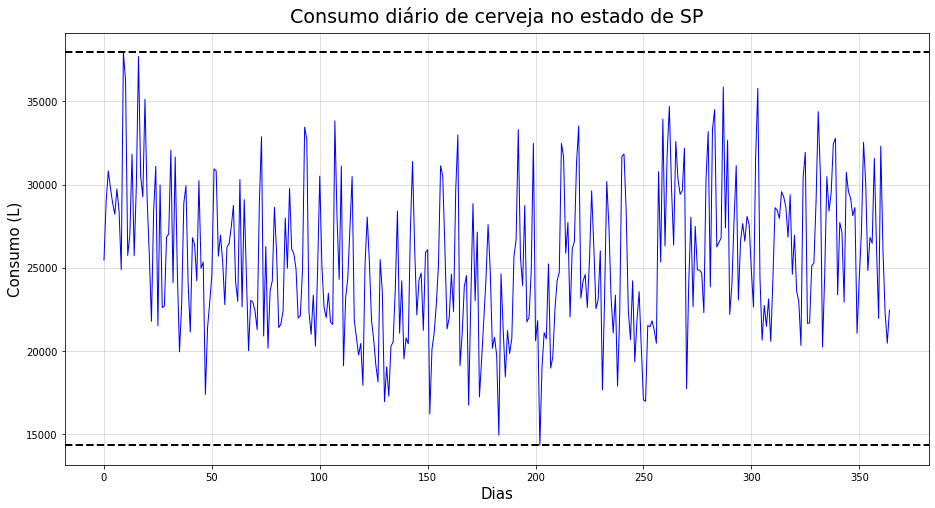

In [12]:
fig = plt.figure(figsize=(12, 6))
eixo = fig.add_axes([0, 0, 1, 1])

# Gráfico
eixo.plot(dados['consumo'], color='b', lw=1)
eixo.grid(True, alpha=.5)

# Pontos de mínimo e máximo
mi, ma = dados['consumo'].min(), dados['consumo'].max()
eixo.axhline(mi, lw=2, ls='--', color='k')
eixo.axhline(ma, lw=2, ls='--', color='k')

# Labels
eixo.set_xlabel('Dias', fontsize=15)
eixo.set_ylabel('Consumo (L)', fontsize=15)
eixo.set_title('Consumo diário de cerveja no estado de SP', fontsize=19, y=1.01);

In [13]:
print(f'Consumo máximo {ma} Litros')
print(f'Consumo mínimo {mi} Litros')

Consumo máximo 37937 Litros
Consumo mínimo 14343 Litros


## Civ. Boxplots

![title](Dados/img/Box-Plot.png)

<a id="boxplots"></a>

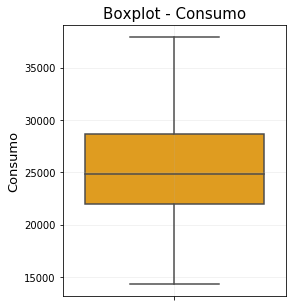

In [14]:
plt.figure(figsize=(4, 5))

# Boxplot da variável consumo
sns.boxplot(dados['consumo'], orient='v', color='orange')
plt.grid(True, alpha=.2)

plt.ylabel('Consumo', fontsize=13)
plt.title('Boxplot - Consumo', fontsize=15);

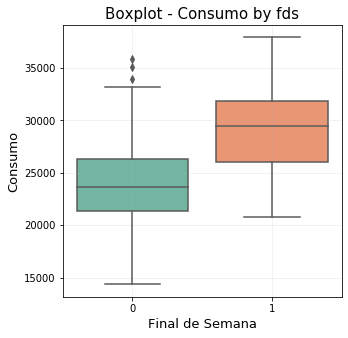

In [15]:
plt.figure(figsize=(5, 5))

# Boxplot da variável consumo by fds
sns.boxplot(x = dados['fds'], y = dados['consumo'], orient='v', palette='Set2')
plt.grid(True, alpha=.2)

plt.xlabel('Final de Semana', fontsize=13)
plt.ylabel('Consumo', fontsize=13)
plt.title('Boxplot - Consumo by fds', fontsize=15);

## Cv. Distribuição de Frequência

<a id="dist"></a>

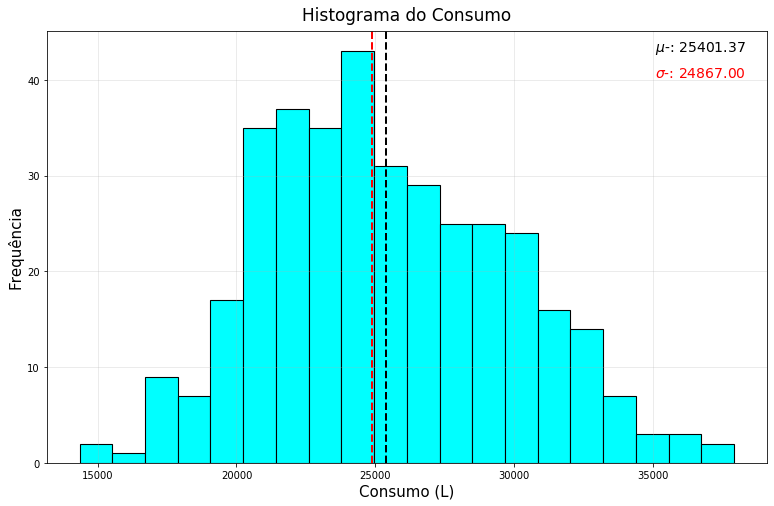

In [16]:
fig = plt.figure(figsize=(10, 6))
eixo = fig.add_axes([0, 0, 1, 1])

# Gráfico
eixo.hist(dados['consumo'], lw=1.1, edgecolor='k', bins= 20, color='aqua')
eixo.axvline(dados['consumo'].mean(), lw=2, ls='--', color='k')
eixo.axvline(dados['consumo'].median(), lw=2, ls='--', color='red')
eixo.grid(True, alpha=.3)

# Anotações
media = dados['consumo'].mean()
mediana = dados['consumo'].median()
eixo.annotate(f"$\mu$-: {media:.2f}", xy=(35080, 43), color='k', fontsize=14)
eixo.annotate(f"$\sigma$-: {mediana:.2f}", xy=(35080, 40.3), color='red', fontsize=14)

# Labels
eixo.set_xlabel('Consumo (L)', fontsize=15)
eixo.set_ylabel('Frequência', fontsize=15)
eixo.set_title('Histograma do Consumo', fontsize=17, y=1.01);

# D. Análises Gráficas <br>

## Di. Gráfico de Dispersão todos x todos

<a id="pairplor"></a>

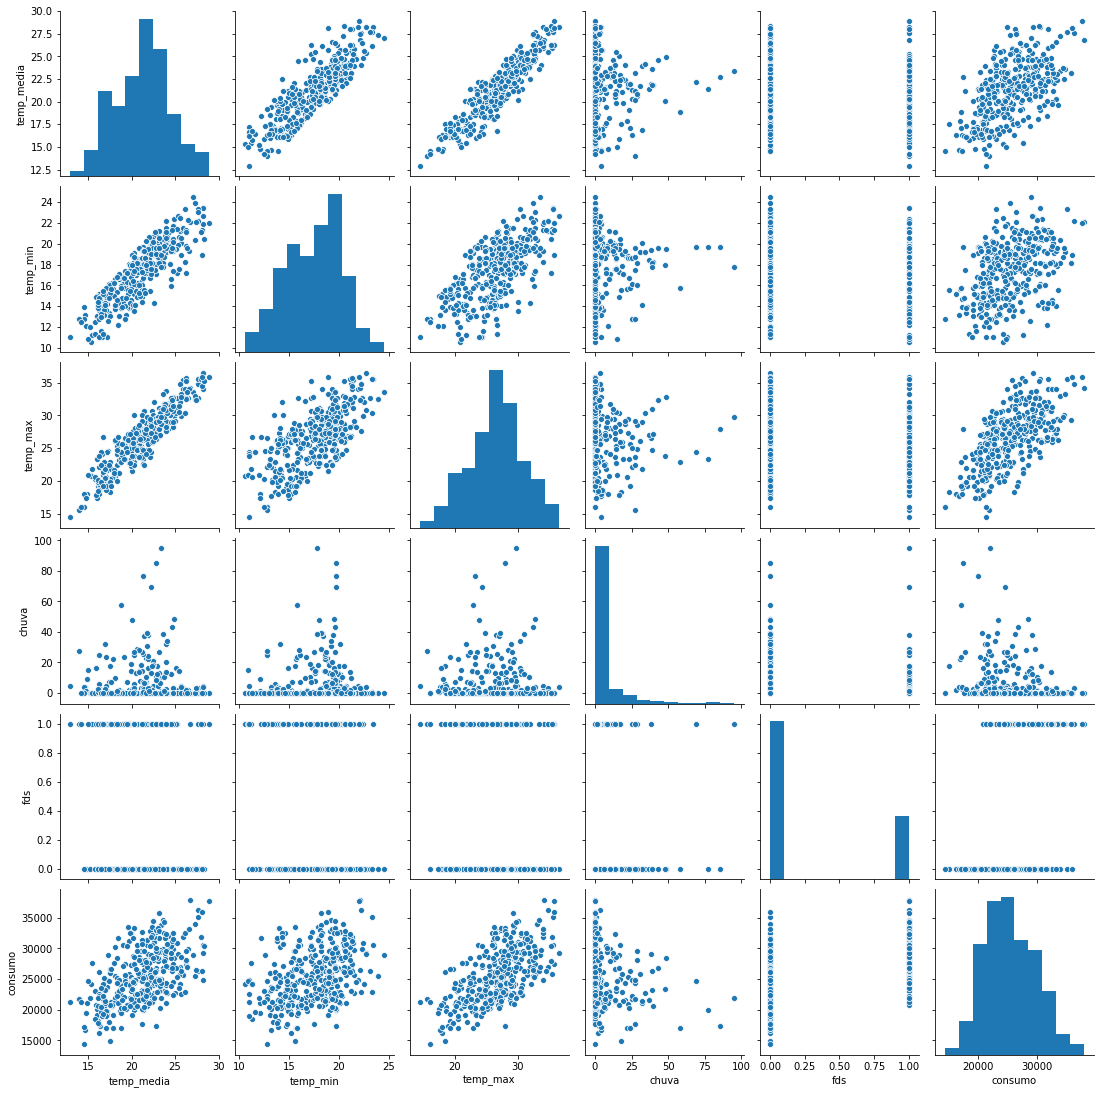

In [17]:
sns.pairplot(dados);

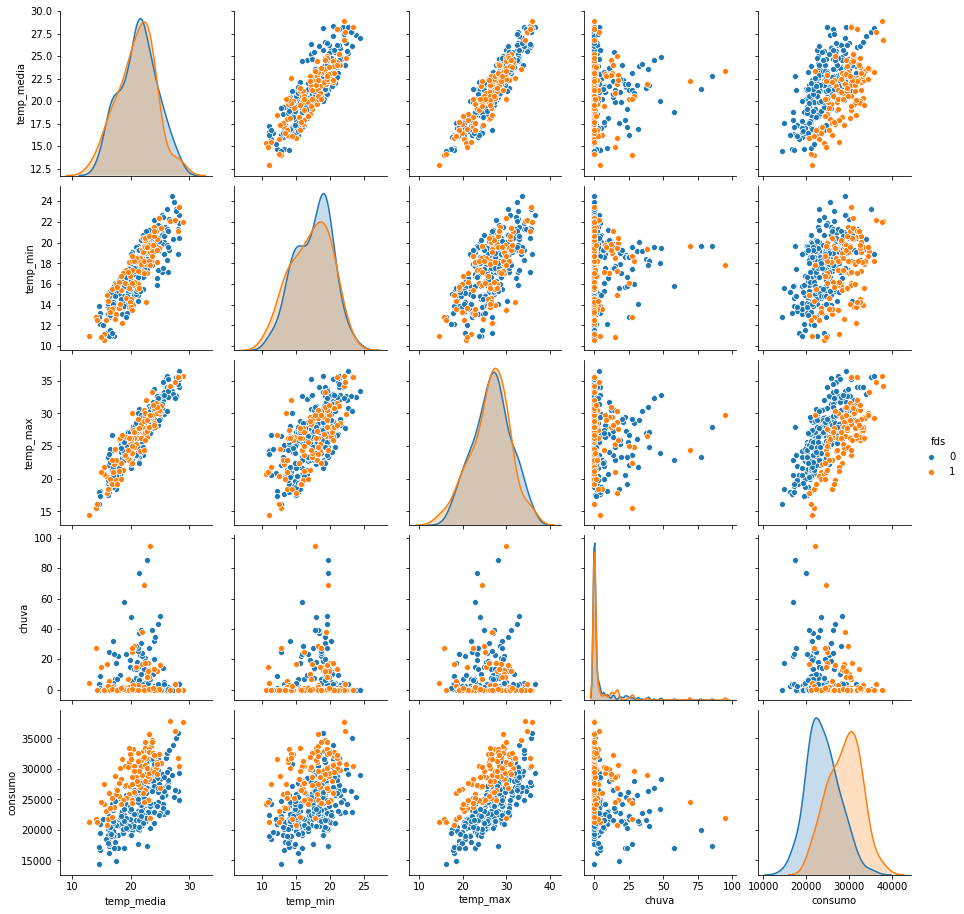

In [18]:
sns.pairplot(dados, hue='fds');

## Dii. Análise de dispersão em relação ao consumo

<a id="dispersão"></a>

In [19]:
dados.head(1)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.3,23.9,32.5,0.0,0,25461


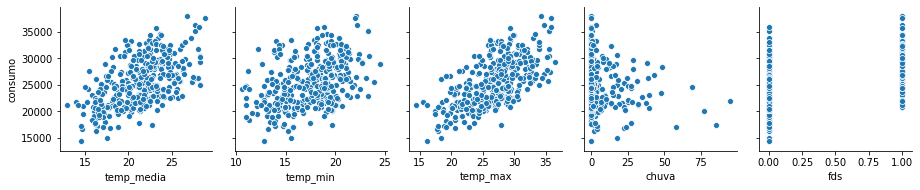

In [20]:
sns.pairplot(x_vars=["temp_media", 'temp_min', 'temp_max', 'chuva', 'fds'], y_vars='consumo', data=dados);

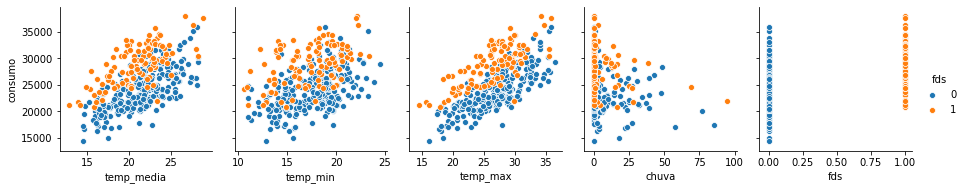

In [21]:
sns.pairplot(x_vars=["temp_media", 'temp_min', 'temp_max', 'chuva', 'fds'], y_vars='consumo', hue='fds', data=dados);

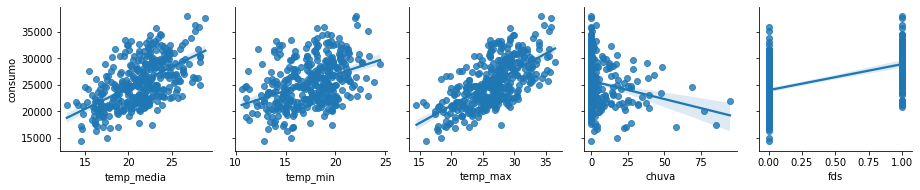

In [22]:
sns.pairplot(x_vars=["temp_media", 'temp_min', 'temp_max', 'chuva', 'fds'], y_vars='consumo', kind='reg', data=dados);

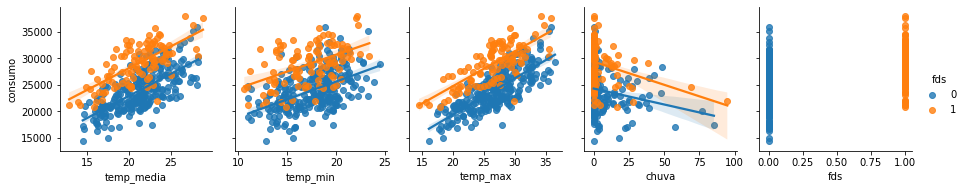

In [23]:
sns.pairplot(x_vars=["temp_media", 'temp_min', 'temp_max', 'chuva', 'fds'], y_vars='consumo', hue='fds', kind='reg', data=dados);

# E. Processo de Separação dos Dados <br>

## Ei. Dados de treino e teste

<a id="separacao"></a>

In [24]:
# Biblioteca utilizada
from sklearn.model_selection import train_test_split as tts

In [25]:
# Fixando um seed aleatório
np.random.seed(2020)

# Realizando a separação dos dados com o train_test_split do Scikit-learning
x, y = dados[['temp_max', 'chuva', 'fds']], dados['consumo']
train_x, test_x, train_y, test_y = tts(x, y, test_size=.2)

# F. Criando Modelo de Regressão Linear <br>

## Fi. Instânciando e treinando o estimador

<a id="linearmodel"> </a>

In [26]:
# Importando o LinearRegression
from sklearn.linear_model import LinearRegression

In [27]:
# Instânciando o LinearRegression
modelo = LinearRegression()

# Visualizando o nosso modelo
modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<img src="Dados/img/reg_01.jpg" width=70%>

In [28]:
# Treinando o estimador
modelo.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

> O <b>R²</b> nos informa a quantidade da taxa de variância dos dados que o modelo consegue explicar. Em outras palavras, o quanto que a reta de regressão foi capaz de se ajustar aos dados da amostra.

## $$R² = \frac{\sum_{i=0}^{n-1}(Y_i - \hat{Y})^2}{\sum_{i=0}^{n-1}(Y_i - \bar{Y})^2}$$

In [29]:
print(f'R²-: {modelo.score(train_x, train_y):.2f}%')

R²-: 0.73%


## Fii. Coeficientes de regressão

<center><img src="Dados/img/reg_02.jpg" width=80%></center>

<a id="coeficientes"></a>

In [30]:
# Coeficietes de regressão
modelo.coef_

array([ 669.04199425,  -55.5648429 , 5360.39202757])

In [31]:
# Intercepto
modelo.intercept_

6351.937967278456

## Fiii. Obtendo o MSE com os dados de teste

<a id="mse"></a>

## $$MSE = \frac{1}{n}{\sum_{i=0}^{n}(Y_i - \hat{Y_i})^2}$$

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
# Gerando previsões com os dados de teste
previsoes = modelo.predict(test_x)

In [34]:
print(f'MSE-: {mean_squared_error(test_y, previsoes):.3f}')

MSE-: 5400708.960


## F iv. Análises Gráficas das Previsões

<a id="previsoes"></a>

**Real x Previsto**

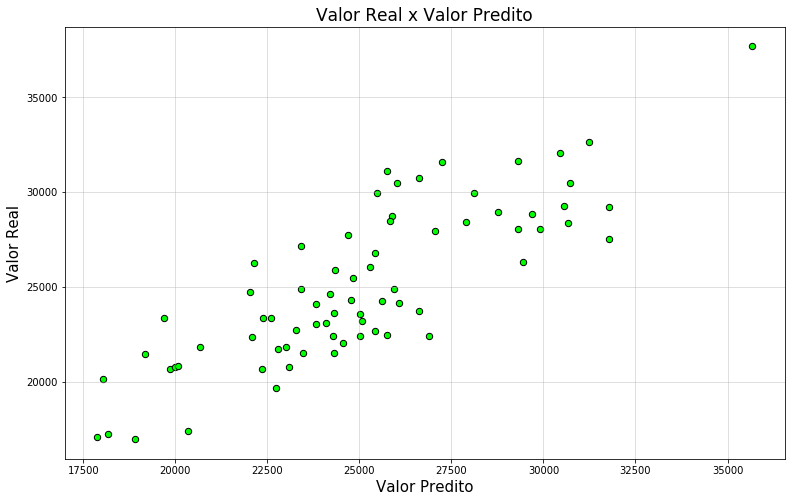

In [35]:
fig = plt.figure(figsize=(10, 6))
eixo = fig.add_axes([0, 0, 1, 1])

# Gráfico
eixo.scatter(previsoes, test_y, edgecolor='k', color='lime', s=40)
eixo.grid(True, alpha=.5)

# Labels
eixo.set_xlabel('Valor Predito', fontsize=15)
eixo.set_ylabel('Valor Real', fontsize=15)
eixo.set_title("Valor Real x Valor Predito", fontsize=17);

**Residuos x Valor Predito**

In [36]:
residuos = test_y - previsoes

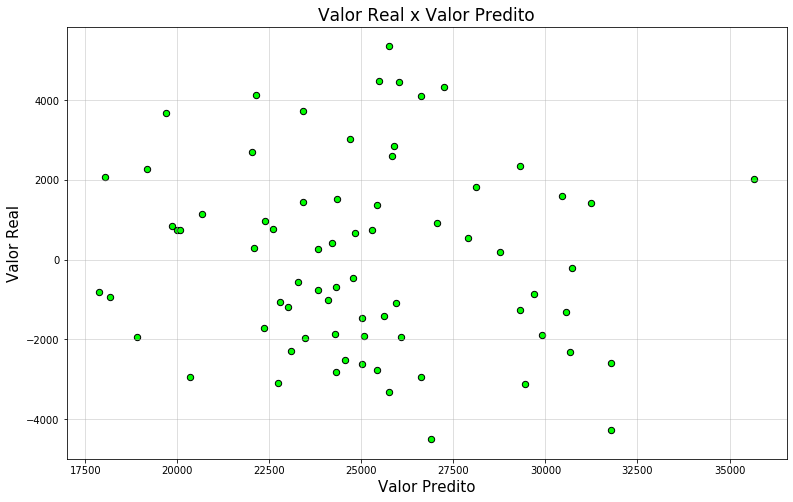

In [37]:
fig = plt.figure(figsize=(10, 6))
eixo = fig.add_axes([0, 0, 1, 1])

# Gráfico
eixo.scatter(previsoes, residuos, edgecolor='k', color='lime', s=40)
eixo.grid(True, alpha=.5)

# Labels
eixo.set_xlabel('Valor Predito', fontsize=15)
eixo.set_ylabel('Valor Real', fontsize=15)
eixo.set_title("Valor Real x Valor Predito", fontsize=17);

**Residuos² x Valor Predito**

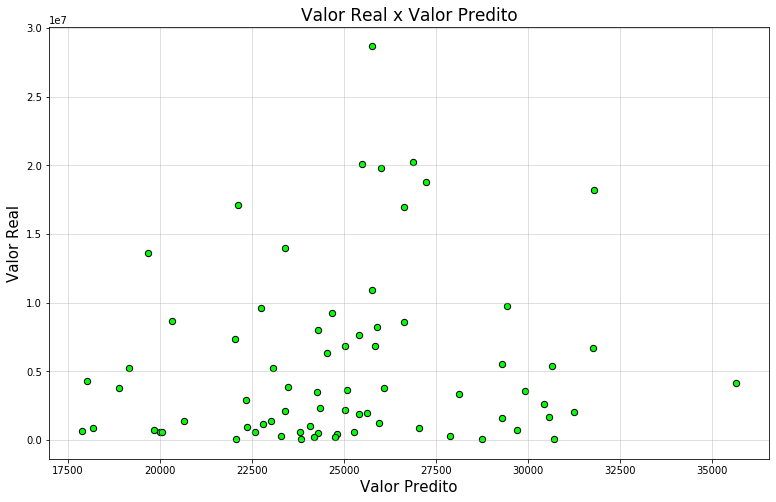

In [38]:
fig = plt.figure(figsize=(10, 6))
eixo = fig.add_axes([0, 0, 1, 1])

# Gráfico
eixo.scatter(previsoes, residuos ** 2, edgecolor='k', color='lime', s=40)
eixo.grid(True, alpha=.5)

# Labels
eixo.set_xlabel('Valor Predito', fontsize=15)
eixo.set_ylabel('Valor Real', fontsize=15)
eixo.set_title("Valor Real x Valor Predito", fontsize=17);

<img src="Dados/img/var_u.jpg" width=80%>

## F v. Salvando Modelo

<a id="salvando"></a>

In [39]:
import pickle

In [40]:
output = open('modelo_salvo', 'wb')
pickle.dump(modelo, output)
output.close()

In [41]:
# Código para importar o modelo
imput = open('modelo_salvo', 'rb')
modelo_ = pickle.load(imput)
imput.close()

In [42]:
# Visualizando o modelo importado
modelo_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
modelo_.coef_

array([ 669.04199425,  -55.5648429 , 5360.39202757])